In [27]:
import numpy as np
# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
# output dataset            
y = np.array([[0,0,1,1]]).T
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    # how much did we miss?
    l1_error = y - l1
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
print(l1)

[[ 0.00966449]
 [ 0.00786506]
 [ 0.99358898]
 [ 0.99211957]]


## 以上11行代码是对神经网络入门的浓缩
### （http://python.jobbole.com/82758/）

In [51]:
###调试矩阵
np.random.seed(2)
XX = np.random.random((4,2))
YY =np.random.random((2,1))
XX.dot(YY)

array([[ 0.13756574],
       [ 0.28086482],
       [ 0.21410752],
       [ 0.2265623 ]])

In [55]:
# 了解nonlin函数  这个函数其实是导数函数也就是学习率
nonlin(XX.dot(YY),True)

array([[ 0.1186414 ],
       [ 0.20197977],
       [ 0.16826549],
       [ 0.17523183]])

## 以下再运用一个Python使用BP神经网络的案例
### (https://www.2cto.com/kf/201612/543750.html)

In [247]:
import numpy as np
from sklearn import datasets
def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200,noise=0.20)
    return X, y

In [68]:
#神经网络结构
class config:
    nn_input_dim = 2
    nn_output_dim = 2
    #梯度下降参数
    epsilon = 0.01
    reg_lambda = 0.01 #正则化长度

In [172]:
#神经网络模型
def build_model(X,y,nn_hdim,num_passes=20000):
    num_example = len(X)
    np.random.seed(0)
    W1 = np.random.randn()


In [171]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
 
 
 class Config:
    nn_input_dim = 2
    nn_output_dim = 2 
    epsilon = 0.01 
    reg_lambda = 0.01 
 
 
def generate_data():
    np.random.seed(0)
    X, y = datasets.make_moons(200, noise=0.20)
    return X, y
 
 
 def visualize(X, y, model):
    plot_decision_boundary(lambda x:predict(model,x), X, y)
    plt.title("Logistic Regression")
 
 
def plot_decision_boundary(pred_func, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()
 
 def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)
 
 
 
def build_model(X, y, nn_hdim, num_passes=20000, print_loss=False):
    num_examples = len(X)
    np.random.seed(0)
    W1 = np.random.randn(Config.nn_input_dim, nn_hdim) / np.sqrt(Config.nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, Config.nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, Config.nn_output_dim))
 
    model = {}
 
    for i in range(0, num_passes):
 
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        dW2 += Config.reg_lambda * W2
        dW1 += Config.reg_lambda * W1
 
        W1 += -Config.epsilon * dW1
        b1 += -Config.epsilon * db1
        W2 += -Config.epsilon * dW2
        b2 += -Config.epsilon * db2
 
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
 
    return model
 
 
 def main():
    X, y = generate_data()
    model = build_model(X, y, 3)
    visualize(X, y, model)
 
 
if __name__ == "__main__":
    main()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

## 上面第二个例子程度还是比较复杂 继续看其他案例
## this is important

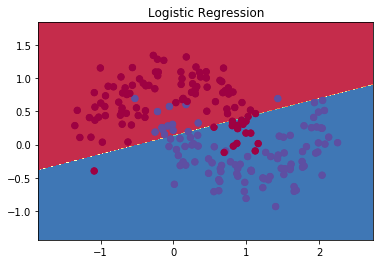

In [234]:
# Generate a dataset and plot it
from sklearn import datasets,linear_model
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

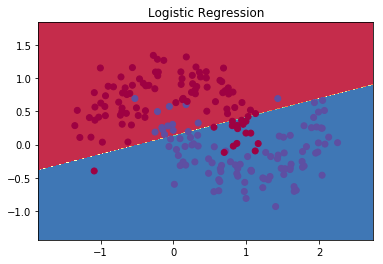

In [236]:
# Train the logistic rgeression classifier
clf = linear_model.LogisticRegressionCV()
clf.fit(X, y)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()

In [237]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [238]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [239]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [240]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
 
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
    # Gradient descent. For each batch...
    for i in list(range(0, num_passes)):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
 
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
 
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    return model

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068890
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


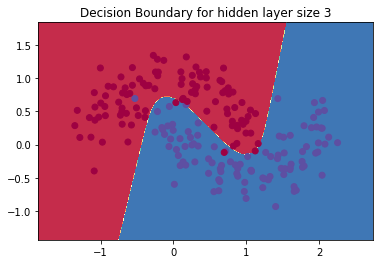

In [243]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.show()

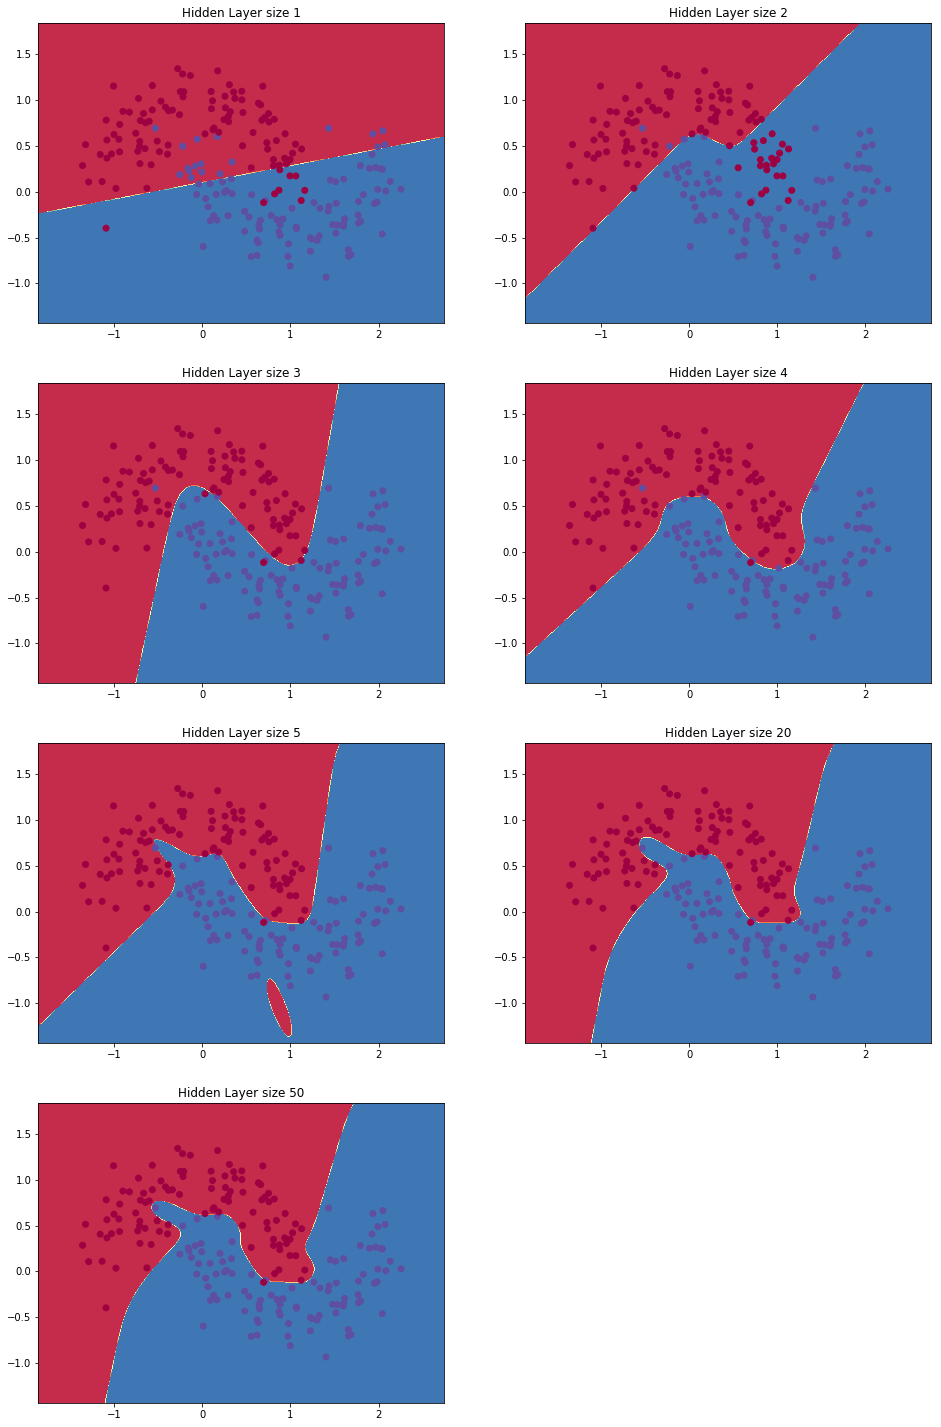

In [244]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()